Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU8proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU8proj.ipynb"

In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Unit 9 Project: Your first neural network

**Introduction**:

I've always been told by my parents and by other adults that screen time and the amount of sleep we get affects our mood and our mental health. I've noticed this to be true in my own life, but I wanted to see if it was true for a large amount of people. I found this dataset that has data from hundreds of people showing how these things affect their mental health.


In [81]:
url="https://raw.githubusercontent.com/vincewilliams1101/DataScience/refs/heads/main/Students%20Social%20Media%20Addiction.csv"
sma = pd.read_csv(url)
sma

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


# Predictors

I wanted to see if I could predict the Mental Health Score that different people got based on three factors. The average number of hours they spend a day on screens, the number of hours of sleep per night, and the addiction score which I am not sure how that is calculated, but the dataset has it on there, so I used it.

In [82]:
health = sma[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Addicted_Score", "Mental_Health_Score"]]
health

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Addicted_Score,Mental_Health_Score
0,5.2,6.5,8,6
1,2.1,7.5,3,8
2,6.0,5.0,9,5
3,3.0,7.0,4,7
4,4.5,6.0,7,6
...,...,...,...,...
700,4.7,7.2,5,7
701,6.8,5.9,9,4
702,5.6,6.7,7,6
703,4.3,7.5,4,8


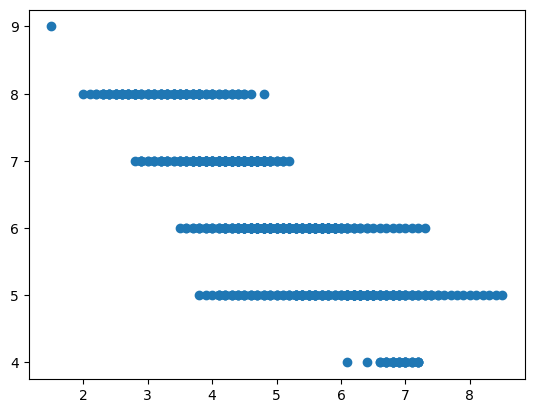

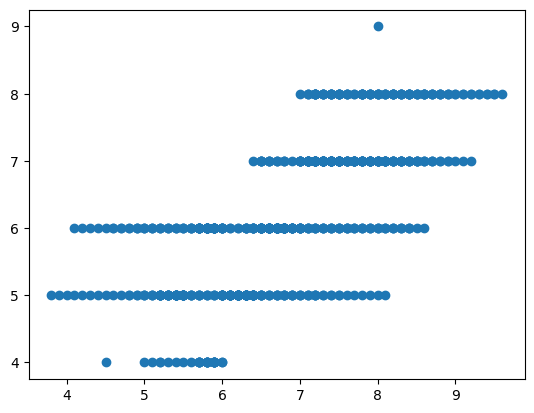

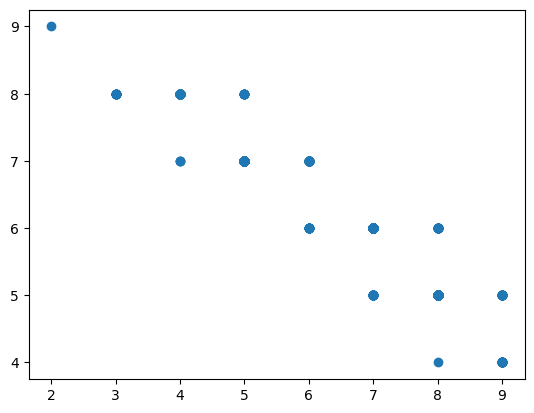

In [125]:
plt.scatter(health.Avg_Daily_Usage_Hours, health.Mental_Health_Score)
plt.show()
plt.scatter(health.Sleep_Hours_Per_Night, health.Mental_Health_Score)
plt.show()
plt.scatter(health.Addicted_Score, health.Mental_Health_Score)
plt.show()

# Data Graphs

Looking at the graphs of our data we can very easily see the trends and see that all three of our predictors are going to affect the mental health score that we get.

In [96]:
predictors = health[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Addicted_Score"]].to_numpy()
X = torch.from_numpy(predictors).float()
y = torch.from_numpy(health["Mental_Health_Score"].to_numpy()).unsqueeze(1).float()

In [98]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-98-6191b6d4c2f7>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-98-6191b6d4c2f7>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-98-6191b6d4c2f7>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-98-6191b6d4c2f7>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sour

# Model

I made this model for my neural network which was copied from Mr. Arredondo's notes, but I changed it a little bit to make it work with three different predictors.

In [113]:
model_00 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=3, out_features=7),
    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

In [114]:
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
#Adam is another similar, popular optimizer
optimizer = torch.optim.SGD(params=model_00.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [115]:
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_00.train()

    # 1. Forward pass; makes predictions
    y_pred = model_00(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_00.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_00(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([564, 1])) that is different to the input size (torch.Size([564])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 35.43956, Test loss: 32.95565
Epoch: 200 | Train loss: 1.61350, Test loss: 2.13147
Epoch: 400 | Train loss: 1.54716, Test loss: 1.95679
Epoch: 600 | Train loss: 1.50726, Test loss: 1.82644
Epoch: 800 | Train loss: 1.48303, Test loss: 1.73020
Epoch: 1000 | Train loss: 1.46816, Test loss: 1.65831
Epoch: 1200 | Train loss: 1.45886, Test loss: 1.60406
Epoch: 1400 | Train loss: 1.45286, Test loss: 1.56268
Epoch: 1600 | Train loss: 1.44883, Test loss: 1.53080
Epoch: 1800 | Train loss: 1.44597, Test loss: 1.50599


In [116]:
model_00.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_00(X_test)

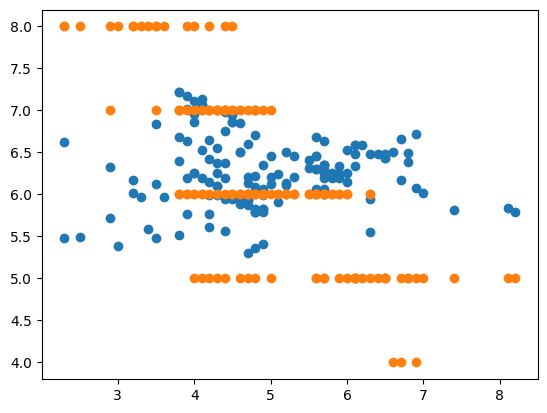

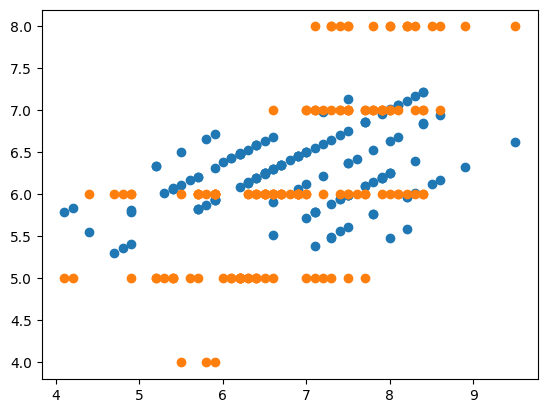

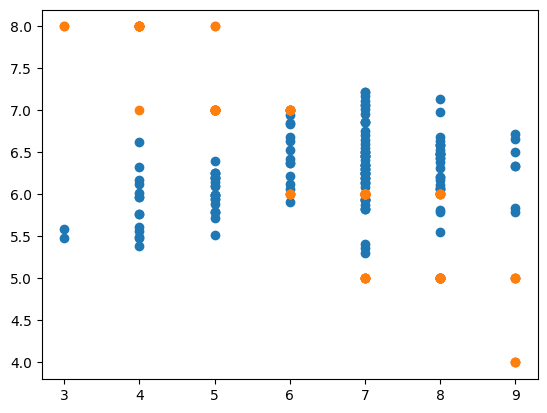

In [122]:
plt.scatter(X_test.detach().numpy()[:,0],y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy()[:,0],y_test)
plt.show()
plt.scatter(X_test.detach().numpy()[:,1],y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy()[:,1],y_test)
plt.show()
plt.scatter(X_test.detach().numpy()[:,2],y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy()[:,2],y_test)
plt.show()

# Predictions Graph

The predictions are in blue and the data is in orange. As we can see our predictions are pretty good. They match the trend of the data pretty well except for the one that shows addicted score. We can clearly see that hours of sleep per night is the best predictor to predict mental health which makes sense as it is the one thing that is actually related to our health rather than just affecting our health.

# Conclusion

I think I created a pretty good neural network here that uses predictors to predict the mental health score of different patients. It makes sense that sleep hours was the most useful predictor. This model can be useful in trying to predict the mental health of patients and shows us the impact of sleep and screen time on our mental health.